<a href="https://colab.research.google.com/github/BhavikDudhrejiya/Feature-Selection-Methods/blob/main/Step_Forward%2C_Step_Backward_%26_Exhaustive_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score, accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.plotting import plot_sequential_feature_selection as plt_sfs

In [5]:
#Loading the data
data = load_wine()

In [6]:
#Checking attributes of the data
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [9]:
#Splitting data into X & y
X = pd.DataFrame(data.data, columns = data.feature_names)
y = data.target

#Checking the shape of the data
X.shape, y.shape

((178, 13), (178,))

In [10]:
#Checking the data
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [11]:
#Checking missing values
X.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [12]:
#Splitting data into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Checking the shape of the data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

#Step Forward Selection

In [15]:
#Creating Step Forward Selection on the data
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=42, n_jobs = -1),
          k_features = 7,
          forward = True,
          floating = False,
          verbose = 2,
          scoring = 'accuracy',
          cv = 4,
          n_jobs = -1)
sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   10.0s finished

[2021-03-10 14:15:32] Features: 1/7 -- score: 0.7746031746031745[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    8.8s finished

[2021-03-10 14:15:41] Features: 2/7 -- score: 0.9575396825396825[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    8.5s finished

[2021-03-10 14:15:49] Features: 3/7 -- score: 0.9928571428571429[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.4s finished

[2021-03-10 14:15:57] Features: 4/7 -- score: 0.9789682539682539[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    7.2s finished

[202

SequentialFeatureSelector(clone_estimator=True, cv=4,
                          estimator=RandomForestClassifier(bootstrap=True,
                                                           ccp_alpha=0.0,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           max_samples=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
 

In [16]:
#Extracting the features
sfs.k_feature_names_

('alcohol',
 'malic_acid',
 'magnesium',
 'flavanoids',
 'proanthocyanins',
 'color_intensity',
 'od280/od315_of_diluted_wines')

In [17]:
#Extracting the index number of features
sfs.k_feature_idx_

(0, 1, 4, 6, 8, 9, 11)

In [18]:
#Extracting the score
sfs.k_score_

0.9930555555555556

In [22]:
#Checking the summary of the SFS
pd.DataFrame(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(6,)","[0.7222222222222222, 0.8333333333333334, 0.742...",0.774603,"(flavanoids,)",0.0709933,0.0442883,0.0255698
2,"(6, 9)","[0.9444444444444444, 1.0, 0.9714285714285714, ...",0.95754,"(flavanoids, color_intensity)",0.050932,0.0317733,0.0183443
3,"(4, 6, 9)","[1.0, 1.0, 0.9714285714285714, 1.0]",0.992857,"(magnesium, flavanoids, color_intensity)",0.0198318,0.0123718,0.00714286
4,"(0, 4, 6, 9)","[0.9722222222222222, 0.9722222222222222, 0.971...",0.978968,"(alcohol, magnesium, flavanoids, color_intensity)",0.0194714,0.012147,0.00701308
5,"(0, 4, 6, 8, 9)","[1.0, 1.0, 0.9714285714285714, 1.0]",0.992857,"(alcohol, magnesium, flavanoids, proanthocyani...",0.0198318,0.0123718,0.00714286
6,"(0, 4, 6, 8, 9, 11)","[0.9722222222222222, 1.0, 1.0, 1.0]",0.993056,"(alcohol, magnesium, flavanoids, proanthocyani...",0.0192809,0.0120281,0.00694444
7,"(0, 1, 4, 6, 8, 9, 11)","[0.9722222222222222, 1.0, 1.0, 1.0]",0.993056,"(alcohol, malic_acid, magnesium, flavanoids, p...",0.0192809,0.0120281,0.00694444


The above table We can see that the features are selected based on their weightage

# Step Forward Selection with possible number of combination

In [27]:
#Creating Step Forward Selection on the data
sfs1 = SFS(RandomForestClassifier(n_estimators=100, random_state=42, n_jobs = -1),
          k_features = (1,8),
          forward = True,
          floating = False,
          verbose = 2,
          scoring = 'accuracy',
          cv = 4,
          n_jobs = -1)
sfs1.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   10.9s finished

[2021-03-10 14:40:21] Features: 1/8 -- score: 0.7746031746031745[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    9.0s finished

[2021-03-10 14:40:30] Features: 2/8 -- score: 0.9575396825396825[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    8.6s finished

[2021-03-10 14:40:39] Features: 3/8 -- score: 0.9928571428571429[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.5s finished

[2021-03-10 14:40:46] Features: 4/8 -- score: 0.9789682539682539[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    7.2s finished

[202

SequentialFeatureSelector(clone_estimator=True, cv=4,
                          estimator=RandomForestClassifier(bootstrap=True,
                                                           ccp_alpha=0.0,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           max_samples=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
 

In [29]:
#Extracting score
sfs1.k_score_

0.9930555555555556

In [30]:
#Extracting the feature names
sfs1.k_feature_names_

('alcohol',
 'magnesium',
 'flavanoids',
 'proanthocyanins',
 'color_intensity',
 'od280/od315_of_diluted_wines')

In [42]:
#Checking the summary of the SFS
pd.DataFrame(sfs1.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(6,)","[0.7222222222222222, 0.8333333333333334, 0.742...",0.774603,"(flavanoids,)",0.0709933,0.0442883,0.0255698
2,"(6, 9)","[0.9444444444444444, 1.0, 0.9714285714285714, ...",0.95754,"(flavanoids, color_intensity)",0.050932,0.0317733,0.0183443
3,"(4, 6, 9)","[1.0, 1.0, 0.9714285714285714, 1.0]",0.992857,"(magnesium, flavanoids, color_intensity)",0.0198318,0.0123718,0.00714286
4,"(0, 4, 6, 9)","[0.9722222222222222, 0.9722222222222222, 0.971...",0.978968,"(alcohol, magnesium, flavanoids, color_intensity)",0.0194714,0.012147,0.00701308
5,"(0, 4, 6, 8, 9)","[1.0, 1.0, 0.9714285714285714, 1.0]",0.992857,"(alcohol, magnesium, flavanoids, proanthocyani...",0.0198318,0.0123718,0.00714286
6,"(0, 4, 6, 8, 9, 11)","[0.9722222222222222, 1.0, 1.0, 1.0]",0.993056,"(alcohol, magnesium, flavanoids, proanthocyani...",0.0192809,0.0120281,0.00694444
7,"(0, 1, 4, 6, 8, 9, 11)","[0.9722222222222222, 1.0, 1.0, 1.0]",0.993056,"(alcohol, malic_acid, magnesium, flavanoids, p...",0.0192809,0.0120281,0.00694444
8,"(0, 1, 3, 4, 6, 8, 9, 11)","[0.9722222222222222, 1.0, 1.0, 1.0]",0.993056,"(alcohol, malic_acid, alcalinity_of_ash, magne...",0.0192809,0.0120281,0.00694444


# Step Backward Selection

In [44]:
#Creating Step Backward Selection on the data
sbs2 = SFS(RandomForestClassifier(n_estimators=100, random_state=42, n_jobs = -1),
          k_features = (1,8),
          forward = False,
          floating = False,
          verbose = 2,
          scoring = 'accuracy',
          cv = 4,
          n_jobs = -1).fit(X_train.values, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   10.1s finished

[2021-03-10 15:20:33] Features: 12/1 -- score: 0.9861111111111112[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    8.8s finished

[2021-03-10 15:20:42] Features: 11/1 -- score: 0.9861111111111112[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    8.6s finished

[2021-03-10 15:20:50] Features: 10/1 -- score: 0.9930555555555556[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.4s finished

[2021-03-10 15:20:58] Features: 9/1 -- score: 0.9930555555555556[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    7.2s finished

[

In [53]:
#Extracting best score
sbs2.k_score_

0.9930555555555556

In [54]:
#Extracting the features index
sbs2.k_feature_idx_

(0, 1, 2, 3, 5, 9, 11)

In [52]:
#Extracting the features
X_train.columns[list(sbs2.k_feature_idx_)]

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'total_phenols',
       'color_intensity', 'od280/od315_of_diluted_wines'],
      dtype='object')

In [47]:
#Checking the summary of the SFS
pd.DataFrame(sbs2.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.9444444444444444, 0.9722222222222222, 1.0, ...",0.979167,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.0369201,0.0230321,0.0132976
12,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12)","[0.9722222222222222, 0.9722222222222222, 1.0, ...",0.986111,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12)",0.0222636,0.0138889,0.00801875
11,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12)","[0.9722222222222222, 0.9722222222222222, 1.0, ...",0.986111,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12)",0.0222636,0.0138889,0.00801875
10,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 11)","[0.9722222222222222, 1.0, 1.0, 1.0]",0.993056,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 11)",0.0192809,0.0120281,0.00694444
9,"(0, 1, 2, 3, 4, 5, 7, 9, 11)","[0.9722222222222222, 1.0, 1.0, 1.0]",0.993056,"(0, 1, 2, 3, 4, 5, 7, 9, 11)",0.0192809,0.0120281,0.00694444
8,"(0, 1, 2, 3, 4, 5, 9, 11)","[0.9722222222222222, 0.9722222222222222, 1.0, ...",0.986111,"(0, 1, 2, 3, 4, 5, 9, 11)",0.0222636,0.0138889,0.00801875
7,"(0, 1, 2, 3, 5, 9, 11)","[0.9722222222222222, 1.0, 1.0, 1.0]",0.993056,"(0, 1, 2, 3, 5, 9, 11)",0.0192809,0.0120281,0.00694444
6,"(0, 1, 2, 5, 9, 11)","[0.9722222222222222, 1.0, 1.0, 0.9714285714285...",0.985913,"(0, 1, 2, 5, 9, 11)",0.0225862,0.0140901,0.00813492
5,"(0, 1, 5, 9, 11)","[0.9722222222222222, 1.0, 1.0, 0.9428571428571...",0.97877,"(0, 1, 5, 9, 11)",0.0378829,0.0236328,0.0136444
4,"(0, 5, 9, 11)","[0.9722222222222222, 0.9722222222222222, 0.971...",0.964683,"(0, 5, 9, 11)",0.0202057,0.0126051,0.00727754


#Exhaustive Feature Selection

In [79]:
#Creating Exhaustive Feature Selection on the data
efs = EFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
          min_features = 4,
          max_features = 5,
          scoring = 'accuracy',
          cv = None,
          n_jobs = -1).fit(X_train, y_train)

Features: 2002/2002

In [80]:
#Extracting score
efs.best_score_

1.0

In [103]:
#Extracting features
efs.best_feature_names_

('alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash')

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


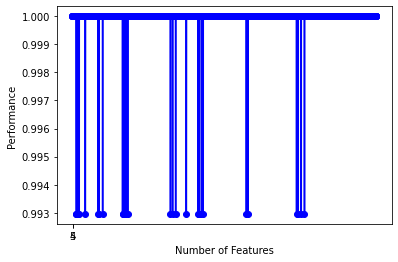

In [102]:
#Visualizing the all featues combination perform in Exhaustive Feature Selection
plt_sfs(efs.get_metric_dict(), kind = 'std_dev');

In [104]:
#Checking the summary of the SBS
pd.DataFrame(efs.get_metric_dict()).T

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0, 1, 2, 3)",[1.0],1,"(alcohol, malic_acid, ash, alcalinity_of_ash)",NaN,0,NaN
1,"(0, 1, 2, 4)",[1.0],1,"(alcohol, malic_acid, ash, magnesium)",NaN,0,NaN
2,"(0, 1, 2, 5)",[1.0],1,"(alcohol, malic_acid, ash, total_phenols)",NaN,0,NaN
3,"(0, 1, 2, 6)",[1.0],1,"(alcohol, malic_acid, ash, flavanoids)",NaN,0,NaN
4,"(0, 1, 2, 7)",[1.0],1,"(alcohol, malic_acid, ash, nonflavanoid_phenols)",NaN,0,NaN
...,...,...,...,...,...,...,...
1997,"(7, 8, 9, 10, 12)",[1.0],1,"(nonflavanoid_phenols, proanthocyanins, color_...",NaN,0,NaN
1998,"(7, 8, 9, 11, 12)",[1.0],1,"(nonflavanoid_phenols, proanthocyanins, color_...",NaN,0,NaN
1999,"(7, 8, 10, 11, 12)",[1.0],1,"(nonflavanoid_phenols, proanthocyanins, hue, o...",NaN,0,NaN
2000,"(7, 9, 10, 11, 12)",[1.0],1,"(nonflavanoid_phenols, color_intensity, hue, o...",NaN,0,NaN
